In [20]:
import matplotlib.pyplot as plt

from ultralytics import NAS

import torch
import cv2
import numpy as np

from super_gradients.training import models
from super_gradients.common.object_names import Models

def LoadMediaPath(path, stride=1):
    # 

    images = []

    strideImages = []

    if ".avi" in path or ".mp4" in path:
    
        videoReader = cv2.VideoCapture(path)

        count = 0
        while True:
        #for i in range(10):

            ret, frame = videoReader.read()

            if not ret:
                break

            if count % stride == 0:
                strideImages.append(frame)

            images.append(frame)

            count += 1
    else:

        image = cv2.imread(path)

        images.append(image)
        strideImages.append(image)

    return [images, strideImages]

images, strides = LoadMediaPath("/home/surfytom/SwimPose/Swim2DPose/Cohoon, Start, Freestyle, 11_01_2024 11_23_43_5_Edited.mp4")

yolo_nas_pose = models.get("yolo_nas_pose_l", pretrained_weights="coco_pose").cuda()

image = cv2.cvtColor(images[25], cv2.COLOR_BGR2RGB)

results = yolo_nas_pose.predict(image, iou=0.3, conf=0.75)

#results.show()

ar = np.array(results.prediction.poses)

[2024-03-14 15:06:50] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the coco_pose dataset, published under the following terms: https://cocodataset.org/#termsofuse
[2024-03-14 15:06:50] INFO - checkpoint_utils.py - License Notification: YOLO-NAS-POSE pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS-POSE.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-03-14 15:06:50] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_pose_l
[2024-03-14 15:06:51] INFO - pipelines.py - Fusing some of the model's la

(-0.5, 1919.5, 1079.5, -0.5)

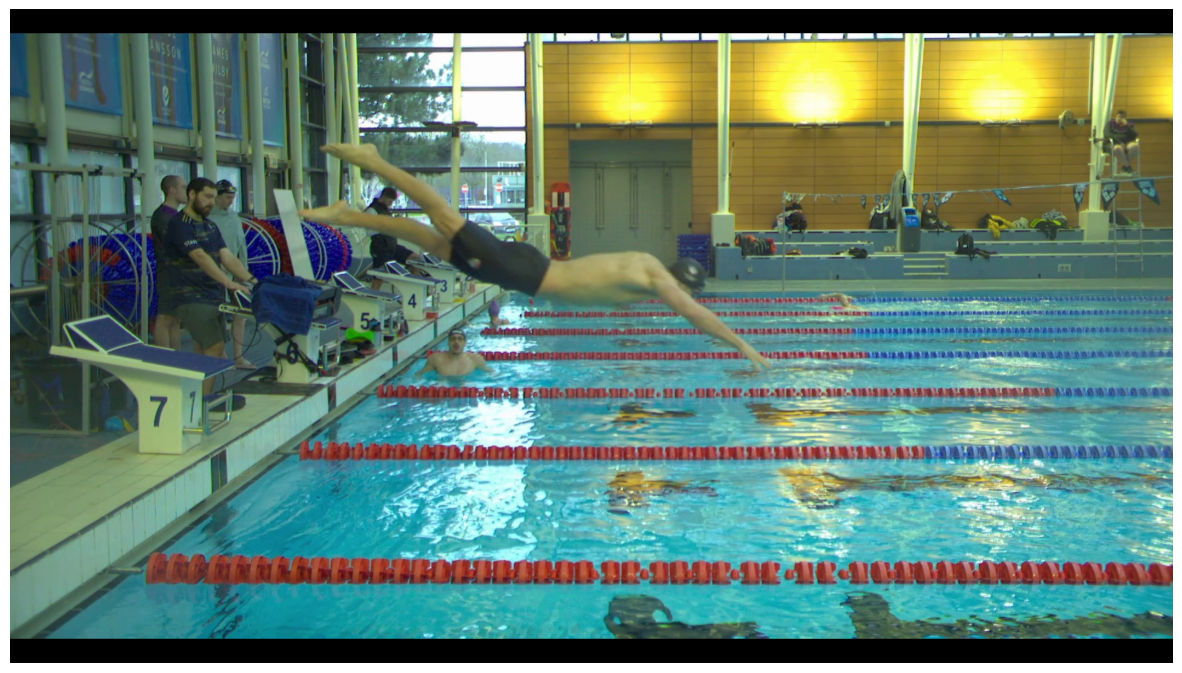

In [8]:
fig = plt.figure(figsize=(15, 15))
plt.imshow(image)

plt.axis(False)

In [21]:
print(ar.shape)

imageDrawn = image

for x, y, z in ar[0]:
    print(f"x {x}, y {y}, z {z}")
    if z >= 0.7:
        cv2.circle(imageDrawn, (int(x), int(y)), 3, (255, 255, 255), -1)

(1, 17, 3)
x 1105.5, y 476.25, z 0.277587890625
x 1113.0, y 463.875, z 0.12188720703125
x 1113.0, y 468.0, z 0.2476806640625
x 1094.25, y 423.375, z 0.237548828125
x 1095.75, y 448.125, z 0.376708984375
x 1030.5, y 426.75, z 0.65478515625
x 1056.75, y 448.5, z 0.88427734375
x 1046.25, y 465.375, z 0.394287109375
x 1149.0, y 506.625, z 0.85546875
x 1125.75, y 522.75, z 0.4072265625
x 1224.75, y 562.875, z 0.82861328125
x 846.0, y 412.875, z 0.88427734375
x 855.0, y 423.75, z 0.93408203125
x 710.25, y 367.125, z 0.8681640625
x 717.0, y 363.5625, z 0.90576171875
x 582.75, y 314.25, z 0.8310546875
x 585.75, y 279.375, z 0.85986328125


(-0.5, 1919.5, 1079.5, -0.5)

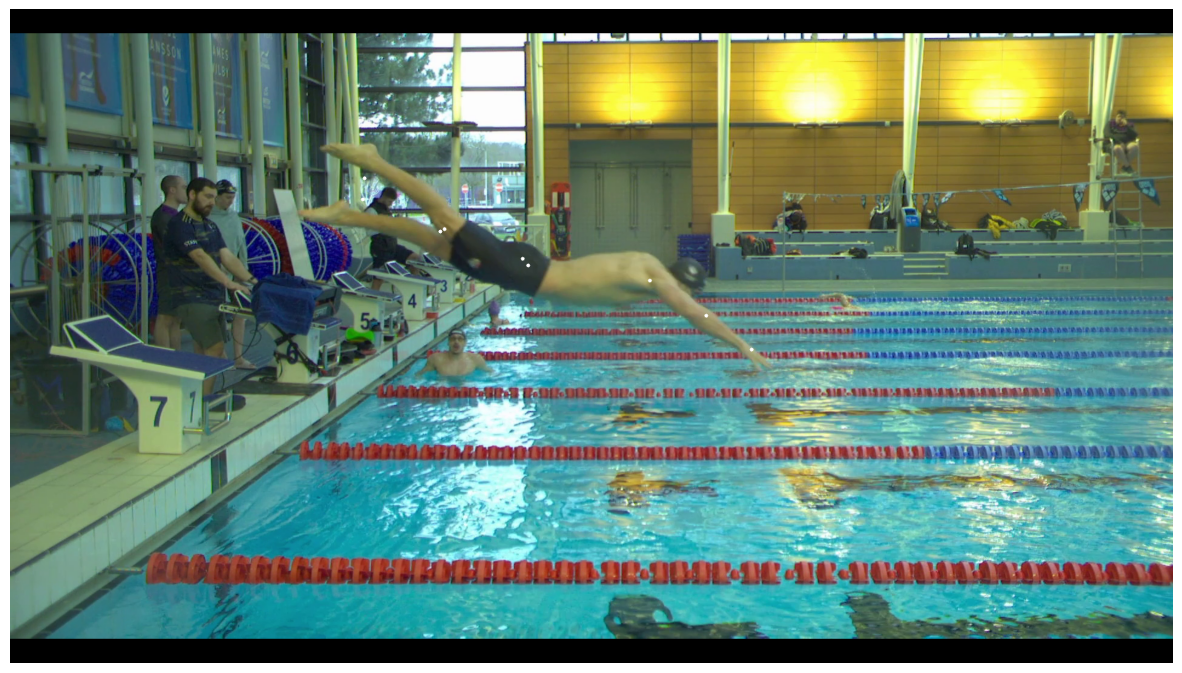

In [22]:
fig = plt.figure(figsize=(15, 15))
plt.imshow(imageDrawn)

plt.axis(False)

In [11]:
results

ImagePoseEstimationPrediction(image=array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), prediction=PoseEstimationPrediction(poses=array([[[     1105.5,      476.25,     0.27759],
        [       1113,      463.88,     0.12189],
        [       1113,  